# Final Project - Introduction to ML 🛒💻📦
Submitters: Hemdat Lebel, Rony Lupatin

##### In this project we recived a data set of user's sessions in an E-Commerce site.  <br>Base on the data set, we will build a system that predicts the chances of a particular user to make a purchase while browsing the site.

### Library Import

In [2]:
#generals
import numpy as np
import pandas as pd
import os
from scipy import stats

#plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#preprocess
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import SCORERS
from sklearn.impute import KNNImputer

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

#model evalutation
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score 

# hide warning
import warnings
warnings.filterwarnings('ignore')

### Data import

In [3]:
# importing the train data
data = pd.read_csv('train.csv')

# importing the test data
test_data = pd.read_csv('test.csv')

## Part 1 - Explorization

In [4]:
# display all columns
pd.set_option('display.max_columns', None)

# display the data
display(data)

id  num_of_admin_pages  admin_page_duration  num_of_info_pages  \
0          0                 0.0                  0.0                0.0   
1          1                 0.0                  0.0                0.0   
2          2                 0.0                  0.0                0.0   
3          3                 0.0                  0.0                0.0   
4          4                 0.0                  0.0                0.0   
...      ...                 ...                  ...                ...   
10474  10474                 3.0                145.0                0.0   
10475  10475                 0.0                  0.0                0.0   
10476  10476                 0.0                  0.0                0.0   
10477  10477                 4.0                 75.0                0.0   
10478  10478                 0.0                  0.0                0.0   

      info_page_duration  num_of_product_pages product_page_duration  \
0            0.0 minutes                   1.0           0.0 minutes   
1            0.0 minutes                   1.0           0.0 minutes   
2                    NaN                   NaN         627.5 minutes   
3            0.0 minutes                  19.0   154.2166667 minutes   
4            0.0 minutes                   1.0           0.0 minutes   
...                  ...                   ...                   ...   
10474        0.0 minutes                  53.0   1783.791667 minutes   
10475        0.0 minutes                   5.0        465.75 minutes   
10476        0.0 minutes                   6.0        184.25 minutes   
10477        0.0 minutes                  15.0         346.0 minutes   
10478        0.0 minutes                   3.0         21.25 minutes   

       total_duration  BounceRates  ExitRates  PageValues  \
0                 NaN     0.200000   0.200000    0.000000   
1            0.000000     0.200000   0.200000    0.000000   
2          627.500000     0.020000   0.050000    0.000000   
3          154.216667     0.015789   0.024561    0.000000   
4                 NaN     0.200000   0.200000    0.000000   
...               ...          ...        ...         ...   
10474     1928.791667     0.007143   0.029031   12.241717   
10475             NaN     0.000000   0.021333    0.000000   
10476             NaN     0.083333   0.086667    0.000000   
10477             NaN     0.000000   0.021053    0.000000   
10478       21.250000     0.000000   0.066667    0.000000   

       closeness_to_holiday Month  device   internet_browser  Region  \
0                       0.0   Feb     1.0          safari_15     1.0   
1                       0.0   Feb     4.0          safari_14     9.0   
2                       0.0   Feb     3.0      browser_3_v17     1.0   
3                       0.0   Feb     2.0      chrome_99.1.3     1.0   
4                       0.4   Feb     2.0  edge_96.0.1054.75     3.0   
...                     ...   ...     ...                ...     ...   
10474                   0.0   Dec     4.0      browser_6_v12     1.0   
10475                   0.0   Nov     3.0      chrome_98.0.1     1.0   
10476                   0.0   Nov     3.0      chrome_99.1.3     1.0   
10477                   0.0   Nov     2.0          chrome_80     3.0   
10478                   0.0   Nov     3.0          chrome_89     1.0   

               user_type Weekend     A           B        C   D  purchase  
0      Returning_Visitor   False   c_1  118.880094   log202 NaN         0  
1      Returning_Visitor   False   c_3  113.358423   log404 NaN         0  
2      Returning_Visitor    True   c_4  121.507695   log202 NaN         0  
3      Returning_Visitor   False   c_3   93.747176  log_100 NaN         0  
4      Returning_Visitor   False   c_3   99.545824   log202 NaN         0  
...                  ...     ...   ...         ...      ...  ..       ...  
10474  Returning_Visitor    True   c_1   79.548460   log400 NaN         0  
10475  Returning_Visitor  

In [5]:
# overall statistics
data.describe()

id  num_of_admin_pages  admin_page_duration  \
count  10479.00000         9874.000000         10066.000000   
mean    5239.00000            2.321957            80.462468   
std     3025.17107            3.335331           179.217548   
min        0.00000            0.000000             0.000000   
25%     2619.50000            0.000000             0.000000   
50%     5239.00000            1.000000             8.000000   
75%     7858.50000            4.000000            93.000000   
max    10478.00000           27.000000          3398.750000   

       num_of_info_pages  num_of_product_pages  total_duration   BounceRates  \
count        9792.000000          10076.000000     5726.000000  10457.000000   
mean            0.502655             31.870187     1302.457216      0.021854   
std             1.265812             44.816259     2039.312905      0.048100   
min             0.000000              0.000000        0.000000      0.000000   
25%             0.000000              7.000000      221.000000      0.000000   
50%             0.000000             18.000000      677.851191      0.002968   
75%             0.000000             38.000000     1605.733333      0.016667   
max            24.000000            705.000000    47850.920680      0.200000   

          ExitRates    PageValues  closeness_to_holiday        device  \
count  10453.000000  10452.000000           9983.000000  10156.000000   
mean       0.042859      5.900387              0.061985      2.122981   
std        0.048297     18.727496              0.199429      0.906859   
min        0.000000      0.000000              0.000000      1.000000   
25%        0.014283      0.000000              0.000000      2.000000   
50%        0.025161      0.000000              0.000000      2.000000   
75%        0.050000      0.000000              0.000000      3.000000   
max        0.200000    361.763742              1.000000      8.000000   

             Region             B           D      purchase  
count  10460.000000  10456.000000  105.000000  10479.000000  
mean       3.155641     99.769628    4.060440      0.154690  
std        2.404672     10.050268    2.189818      0.361626  
min        1.000000     60.733919   -1.235571      0.000000  
25%        1.000000     93.030568    3.141657      0.000000  
50%        3.000000     99.787249    4.432221      0.000000  
75%        4.000000    106.506626    5.531061      0.000000  
max        9.000000    141.735142    7.618254      1.000000

In the data we have informative features and unknown features that we don't know what their value's meaning. <br>
For the explorization we split all the features into 2 lists - numerical and categorical. <br>
In addition, we created a log list that contains the feature with high values range so we can easily preform log scale to their values. (comment: this was enabled after our first run, to better visualize and see the distribution of the data) <br>


In [6]:
# Create lists of features that we can use in the future
# All the numeric features - continuous and discrete
numeric_features = ['num_of_admin_pages','admin_page_duration', 'num_of_info_pages','info_page_duration','num_of_product_pages','product_page_duration','total_duration','BounceRates','ExitRates','PageValues','B','D']

# All the categorical features
categorical_features = ['closeness_to_holiday','Month','device','internet_browser','Region','user_type','Weekend','A','C']

#list of features that we want to log scale the y-axis
log_list =  ['admin_page_duration', 'info_page_duration','num_of_admin_pages','num_of_info_pages','num_of_product_pages','product_page_duration','total_duration','BounceRates','PageValues']

we will apply some "repair" function that will make our explorization work easier.

In [7]:
# some functions that will help us work on the data
def repair_internet_browser (df, browser_lst : list): # remove the version of the browser
    for browser in browser_lst:
        cond = (df['internet_browser'].notna()) & (df['internet_browser'].str.contains(browser))
        df['internet_browser'].loc[cond] = browser

def repair_duration(df, cols_of_duration: list): # remove "minuts" + change duration to int
    for col in cols_of_duration:
        if isinstance(df[col][0], str): 
            df[col] = df[col].str.rstrip('minutes')
            df[col] = df[col].astype(float)

def repair_A(df): # change all the values after 20 to 20
    labels = df['A'].astype('category').cat.categories.tolist()
    replace_map = {}
    for label in labels:
        if isinstance(label, str):
            replace_map[label]= label
            if '20' in replace_map[label]:
                replace_map[label]= 'c_20'
            else:
                continue
    df.replace(replace_map, inplace=True)

In [8]:
# Apply all repair functions
repair_internet_browser (data, ['browser', 'chrome', 'edge', 'safari'])
repair_duration(data, ['info_page_duration','product_page_duration'])
repair_A(data)

### Historgram & Bar plots

Lets take a look on numerical features histograms to explore their distributions.

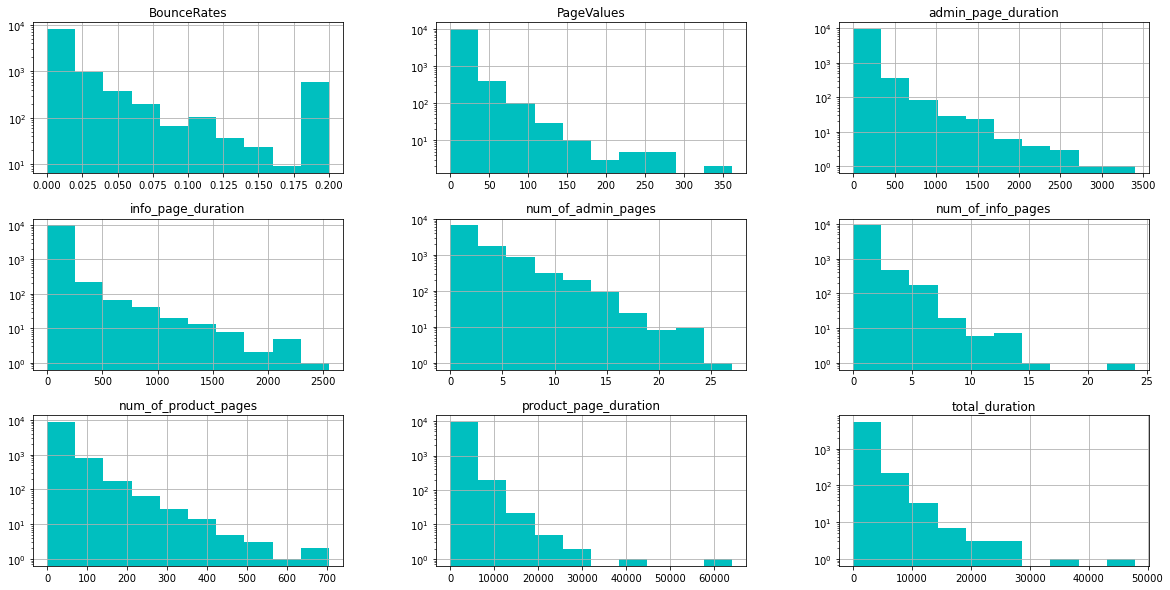

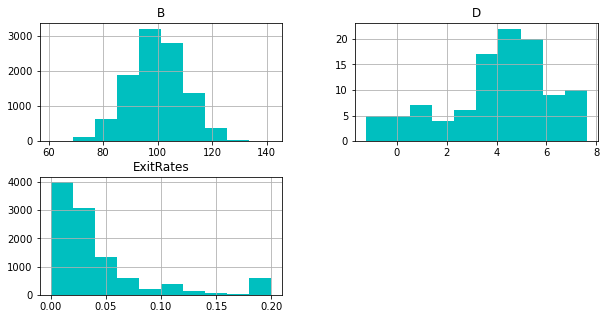

In [9]:
# histogram of numeric features
data[log_list].hist(figsize=(20,10),log= True, color = 'c')
numeric_no_log_lst = [feature for feature in numeric_features if feature not in log_list]
data[numeric_no_log_lst].hist(figsize=(10,5), color = 'c');

from the histograms we can see that feature B looks like it follows the normal distribution even though it is not tested yet.<br><br>
Now we will create for each feature histogram or barplot of values with the same label - green for purchase and red for non purcahse. <br>
We want to do this in order to find incompatibilities in the distribution of labels that will help us understand which features can be significant.

In [10]:
# bar plot & hist plots grid functions
def bar_plot_feature (df, feature, ax, row, col): # create bar plot for categorial
    not_na = ~df[feature].isna()
    pos = df[feature][not_na][df['purchase'] == 1][not_na]
    neg = df[feature][not_na][df['purchase'] == 0][not_na]
    pos_lst = list(pos.value_counts().sort_index())
    if feature == 'A':
        pos_lst.insert(13,0)
        pos_lst.insert(15,0)
        pos_lst.insert(16,0)
    neg_lst = list(neg.value_counts().sort_index())
    x= df[feature][not_na].unique()
    x.sort()
    plot_df = pd.DataFrame({'purchase': pos_lst ,'no purchase':neg_lst },index=x)
    # create stacked bar chart 
    plot_df.plot(kind='bar', color=["#77DD76", "#FF6962"],title = feature, edgecolor ='black', ax=ax[row,col])
    
def hist_plot_feature (df, feature, log_list, ax, row, col): # create histogram for numerical 

    if feature in log_list:
        plot = sns.histplot(x=feature, hue='purchase' ,data=df,bins=20,palette = ["#FF6962", "#77DD76"],
                            edgecolor = 'black',multiple= "dodge", ax=ax[row,col])
        plot.set_yscale('log')
    else:
        plot = sns.histplot(x=feature, hue='purchase' ,data=df,bins=20,palette = ["#FF6962", "#77DD76"],
                            edgecolor = 'black',multiple= "dodge", ax=ax[row,col])
    plot.set(title =feature)
    plot.set(xlabel ="")
    
def grid_barplot(nrows, ncols, data, features_list, figsize): # create grid for bar plot
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)

    for i,feature in enumerate(features_list):
        curr_row = int(i/ncols)
        curr_col = i%ncols
        bar_plot_feature(data, feature, ax, curr_row, curr_col)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()


def grid_histplot(nrows, ncols, data, features_list, log_list, figsize): #create grid for hist plot  
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)

    for i,feature in enumerate(features_list):
        curr_row = int(i/ncols)
        curr_col = i%ncols
        hist_plot_feature(data, feature, log_list ,ax, curr_row, curr_col)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

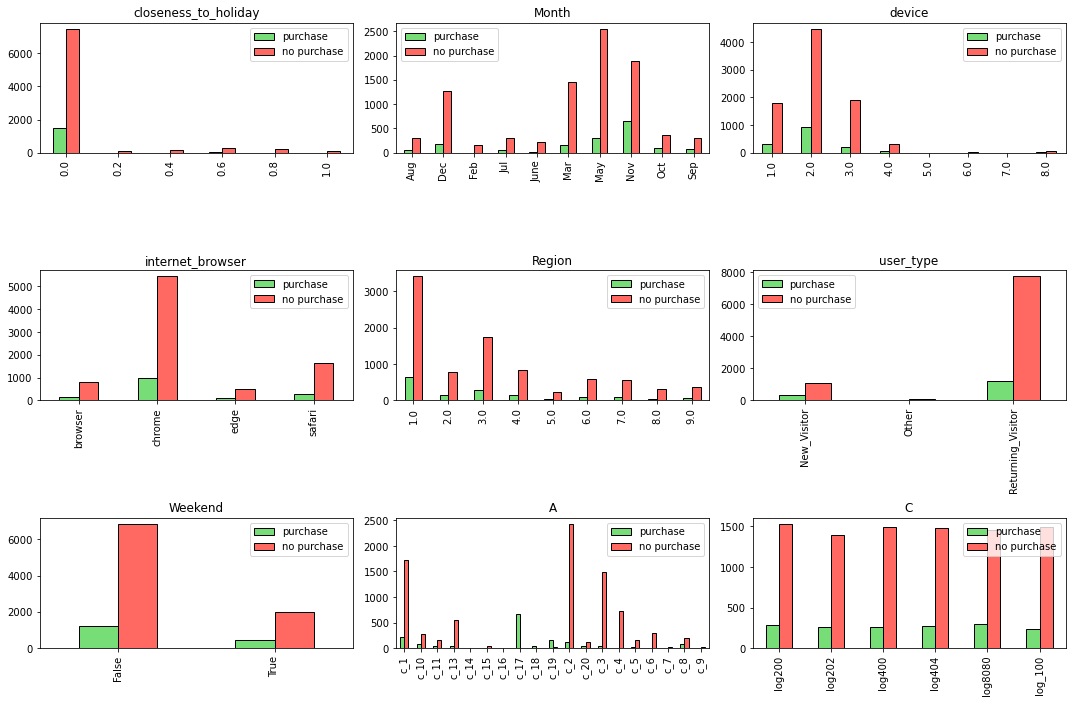

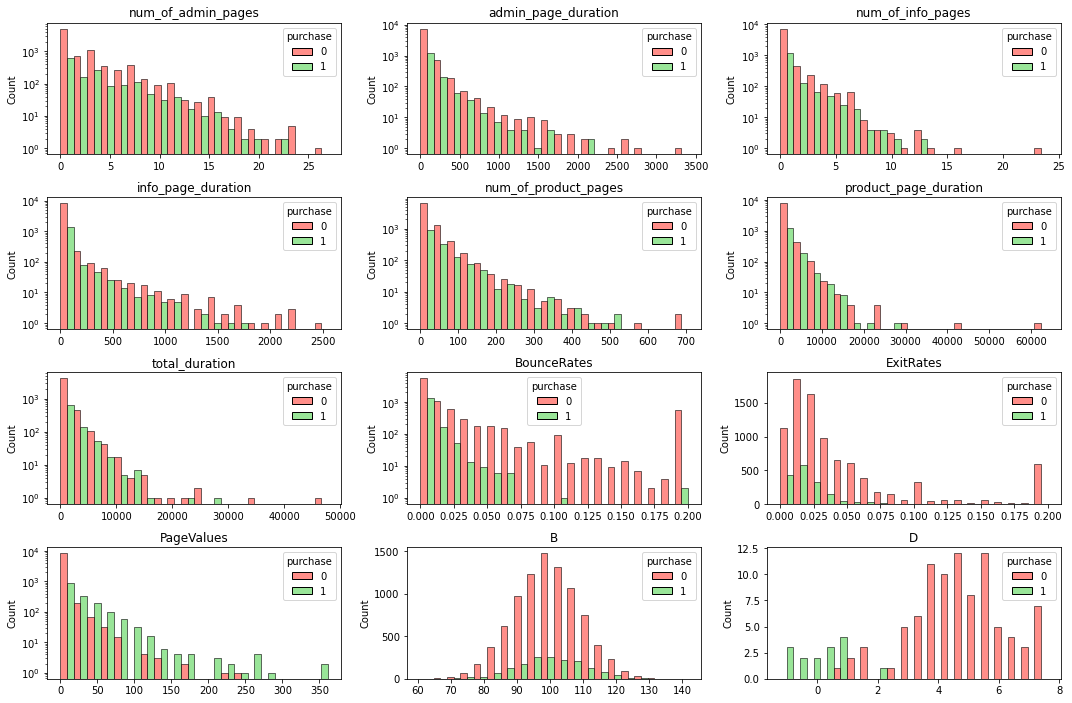

In [11]:
# plot grids of bar plots and hist plots
grid_barplot(3,3, data, categorical_features, (15,10))
grid_histplot(4,3, data, numeric_features, log_list, (15,10))

From The plots above we discovered information that might help us later- <br>
* Some features histograms look different when taking the label into consideration.<br> This might indicate that this features are important. for example: closeness_to_holiday, BounceRates ,ExitRates ,D.
* In feature C it can be seen that all categories behave more or less the same in terms of purchase or non-purchase and therefore this feature may not contribute useful information.
* Another thing we notice is that in features 'A' and 'device' (categorial features) some of the categories has extrimly low amount of samples compering to other categories. Lets take a look on that using pie charts. 

### Pie charts

To better understand the proportions of some categorical features, we will display some pie charts

In [12]:
# This function makes a pie chart
def plot_pie_chart(df, column):
    pie_data = df[column].value_counts().reset_index()
    pie_data.columns = [column, 'freq']
    pie_data
    fig = px.pie(pie_data, values='freq', names = column, color_discrete_sequence=px.colors.qualitative.Prism, 
        title = column)
    fig.show()
# list for features to pie chart
pie_features = ['A','device','internet_browser','Region','user_type','Weekend']

for feature in pie_features:
    plot_pie_chart(data, feature)

A number of conclusions can be drawn from the pie charts:
1. Indeed some of 'A' and 'device' categories has extrimly low amount of samples , So we will unite those categories to one category - 'other'.
2. You can see that the most common device to purchase from is device number 2 and that the most common browser is Chrome. Since they are relatively common in similar percentages we may see a connection between them later.
3. Most of the data is made up of returning customers which can indicate that the site is failing to attract a lot of new customers.
4. You can see that most of the sessions were on the weekend and it does make sense that people have time to shop online more on the weekend

In [13]:
# unite categories functions
def unite_categories (df, cat_dict): #for given feature categories, unite them to 'other' category
    for feature in cat_dict.keys():
        df[feature].replace(to_replace = cat_dict[feature] ,value = 'other', inplace = True)

# define dict of features to unite categories in
cat_dict = {'A': ['c_7','c_9','c_12','c_15','c_19', 'c_14' ,'c_18', 'c_16','c_17'], 'device': [7.0, 5.0 ,4.0 ,8.0, 6.0]}

In [14]:
# unite categories in 'A' & 'device'
unite_categories(data, cat_dict) 

## Part 2 - Preprocessing

### Outliers

Outliers can be a problem for machine learning models - they can affect the models and cause its prediction to not be accurate. <br>
We treat outliers as sampels with extreme values. <br>
We will use boxplots to explore if any outliers exsist in the data.

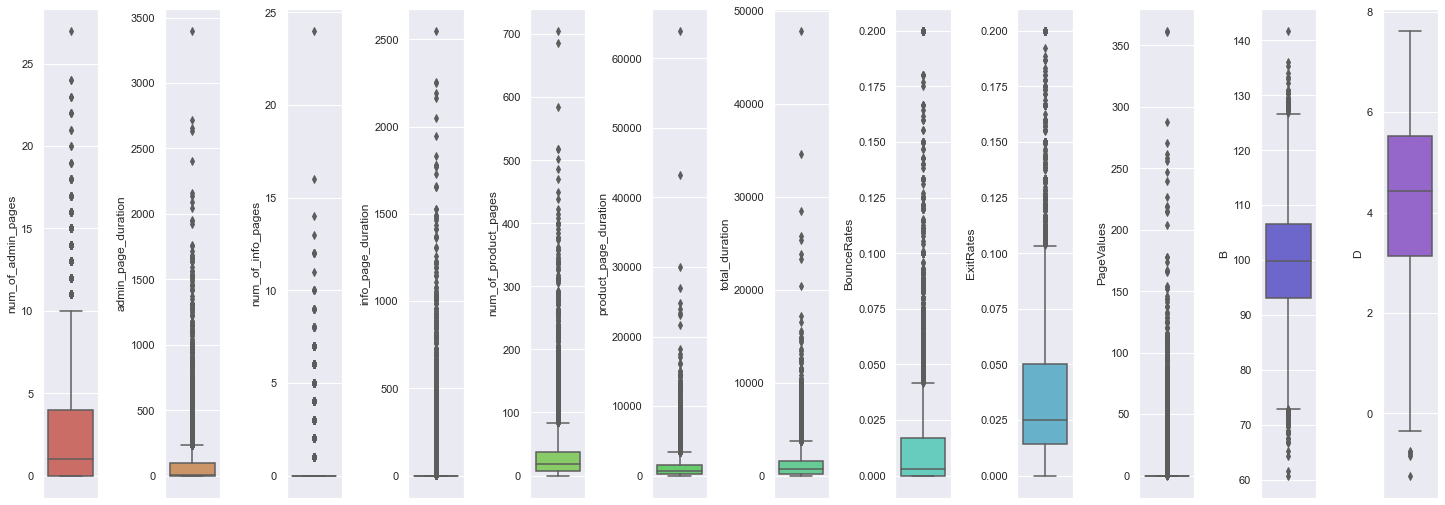

In [15]:
# Outliers show with boxplot
# lists of features for the boxplot
numeric_features_for_boxplot = ['num_of_admin_pages','admin_page_duration', 'num_of_info_pages','info_page_duration','num_of_product_pages','product_page_duration','total_duration','BounceRates','ExitRates','PageValues','B','D']

# boxplot preperation
sns.set()
fig, axes = plt.subplots(1, len(numeric_features_for_boxplot), figsize = (25,9))
palette_custom = sns.color_palette("hls", 15)
plt.subplots_adjust(wspace = 1.2)

# iterate featrues
for i, column in enumerate(numeric_features_for_boxplot):
    sns.boxplot(y=column ,data=data, color = palette_custom[i], ax=axes[i])
plt.show()

All the dots outside the boxes representing outliers, so we can see there are some outliers in the data. <br> Lets take a closer look on them using scatter plots.

Outliers show with scatterplot


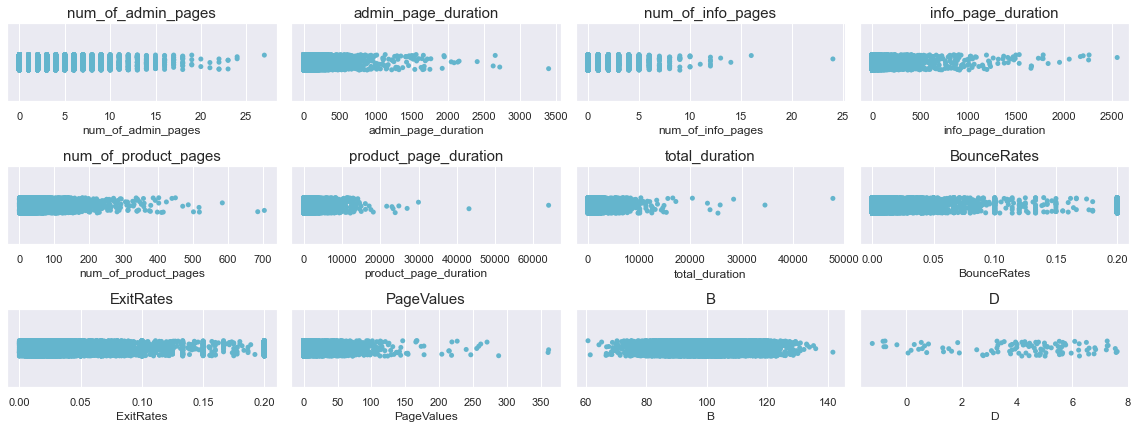

Outliers show with scatterplot with labels


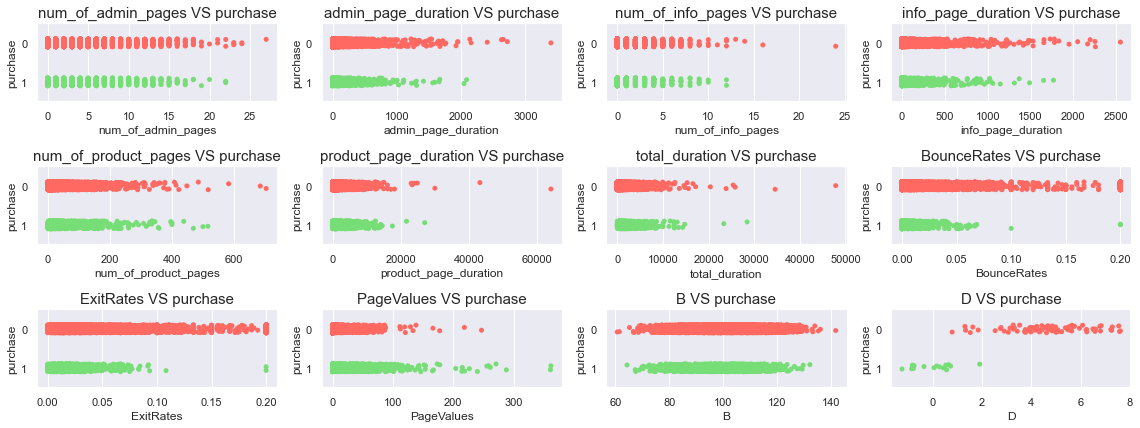

In [16]:
#Outliers show with scatterplot without labels
print("Outliers show with scatterplot")
fig, ax = plt.subplots(3, 4, figsize=(16,6))
for i,feature in enumerate(numeric_features_for_boxplot):
     #random_df.plot(kind='scatter', x=col, y='MEDV', ax=ax[i])
    if i <= 3:
        sns.stripplot(data[feature], color = 'c',orient = 'h', ax=ax[0,i]).set_title (feature, fontsize = 15)
    elif i <=7 :
        sns.stripplot(data[feature], color = 'c',orient = 'h', ax=ax[1,i-4]).set_title (feature, fontsize = 15)
    else:
        sns.stripplot(data[feature], color = 'c',orient = 'h', ax=ax[2,i-8]).set_title (feature, fontsize = 15)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()
plt.clf()
plt.close()

#Outliers show with scatterplot with labels
print("Outliers show with scatterplot with labels")
fig, ax = plt.subplots(3, 4, figsize=(16,6))
for i,feature in enumerate(numeric_features_for_boxplot):
     #random_df.plot(kind='scatter', x=col, y='MEDV', ax=ax[i])
    if i <= 3:
        sns.stripplot(data[feature],data['purchase'], palette = ["#FF6962", "#77DD76"],orient = 'h', ax=ax[0,i]).set_title (feature+" VS purchase", fontsize = 15)
    elif i <=7 :
        sns.stripplot(data[feature],data['purchase'], palette = ["#FF6962", "#77DD76"],orient = 'h', ax=ax[1,i-4]).set_title (feature+" VS purchase", fontsize = 15)
    else:
        sns.stripplot(data[feature],data['purchase'], palette = ["#FF6962", "#77DD76"],orient = 'h', ax=ax[2,i-8]).set_title (feature+" VS purchase", fontsize = 15)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()
plt.clf()
plt.close()

From the scatter plots we can decide more accurately if and which outliers we would like to remove from each feature.<br>
We can also see which features has significant ouliers like product page duration, num of info pages and which features has less obvious outliers like B, D, ExitRates. <br><br>
The following QQ-plot for feature B is going to verify or reject the hypothesis that it is normally distributed.<br>
That will help as handel its outliers more easily.

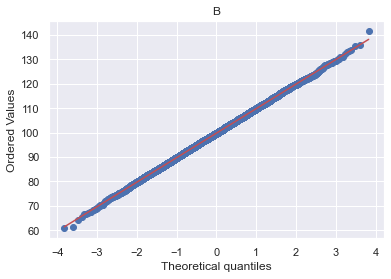

In [17]:
#QQ plot for normal distribution
not_na = ~data['B'].isna()
stats.probplot(data['B'][not_na], dist="norm", plot=plt)
plt.title('B')
plt.show()

The more the blue dots follow the red line, the more the feature is normally distributed. <br>
So it can be determined that B is normally distributed! <br>
Now we will remove B's outliers using Standard Deviation method - The data points which fall below mean-3*(sigma) or above mean+3*(sigma) will be removed.

In [18]:
# outliears removal for normally distributed feature with Standard Deviation method
def outlier_removal_SD (df, feature):
    df[feature] = np.array(df[feature])
    mean = np.mean(df[feature], axis=0)
    sd = np.std(df[feature], axis=0)

    df = df.drop(df[df[feature] > (mean + (3 * sd))].index)
    df = df.drop(df[df[feature] < (mean - (3 * sd))].index)
    return df

In [19]:
data = outlier_removal_SD(data , 'B')

For the other features we will handel the outliers by setting a threshold that holds 99.5% of the data, that all the values above it will be removed.

In [20]:
# ouliers removal by thresholds functions
def calc_threshold (df, features, threshold): #calculate the threshold value that keep 9%
    threshold_dict ={}
    for feature in features:
        threshold_dict[feature] = df[feature].quantile(threshold)
    return threshold_dict

def remove_by_thresholds (df, features,threshold, to_print = True): #remove all the samples that is above the givan threshold
    if (to_print):
        print("The number of rows before removing outliers is: " + str(df.shape[0]))
    threshold_dict = calc_threshold (df, features,threshold)
    for feature in threshold_dict.keys():
        df = df.drop(df[df[feature] > threshold_dict[feature]].index)
    if (to_print):
        print("The number of rows after removing outliers is: " + str(df.shape[0]))
    return df 

# list of feature to remove outliers with threshold
features_to_thresholds= ['num_of_admin_pages',
            'admin_page_duration',
            'num_of_info_pages',
            'info_page_duration',
            'num_of_product_pages',
            'product_page_duration',
            'total_duration',
            'PageValues']   

In [21]:
# removing outliers
data = remove_by_thresholds(data,features_to_thresholds,0.995)

The number of rows before removing outliers is: 10451
The number of rows after removing outliers is: 10191


So in total we removed 260 outliers from the data, hoping it will make our models more accurate.

In [22]:
# reset the rows index after removing samples
data.reset_index(drop=True, inplace=True)

### Normalization

Many algorithms are sensitive to features being on different scales. So, we would like to bring all the features to the same scale. <br>
After weighing the different normalization methods and took the trade-offs in considerations we came up with the following motivation:
<br>
* For the features that normally distribute, we used the StandardSclare to have a common mean (0) and variance (1).<br>
* The rest of the features were normalized using MinMaxScaler. It is much more adequate for them.

In [23]:
# normalization functions
def norm_min_max(df, features_lst): # min max normalization
    df[features_lst] = MinMaxScaler().fit_transform(df[features_lst])
    return df

def norm_standard_scaler(df, features_lst): # standart scaler normalization
    df[features_lst] = StandardScaler().fit_transform(df[features_lst])
    return df

# create feature lists for normalization
features_to_min_max = ['num_of_admin_pages','admin_page_duration', 'num_of_info_pages','info_page_duration','num_of_product_pages','product_page_duration','total_duration','BounceRates','ExitRates','PageValues','D']
features_to_standard_scaler = ['B']

In [24]:
# apply normalization
data = norm_min_max(data, features_to_min_max)
data = norm_standard_scaler(data, features_to_standard_scaler)

### Missing values

Many machine learning algorithms fail if the dataset contains missing values. Thus, it is important to handle the missing values appropriately. <br>
Let's start by checking how many missing values there are and and their percentage.

In [25]:
# create missing values table by feature
def count_missing_values (df):
    missing_value_df = pd.DataFrame({'nan':df.isnull().sum(),'nan percent' :df.isnull().sum() * 100 / len(df)})
    missing_value_df.sort_values('nan',inplace=True, ascending = False)
    display(missing_value_df)

In [26]:
# first count of the missing values
count_missing_values(data)

nan  nan percent
D                      10086    98.969679
total_duration          4612    45.255618
A                        689     6.760867
num_of_info_pages        662     6.495928
product_page_duration    601     5.897360
num_of_admin_pages       585     5.740359
internet_browser         543     5.328231
closeness_to_holiday     487     4.778726
admin_page_duration      408     4.003533
num_of_product_pages     395     3.875969
device                   316     3.100775
info_page_duration       306     3.002649
PageValues                27     0.264940
ExitRates                 25     0.245314
Month                     24     0.235502
user_type                 23     0.225689
Weekend                   23     0.225689
B                         23     0.225689
C                         23     0.225689
BounceRates               21     0.206064
Region                    19     0.186439
id                         0     0.000000
purchase                   0     0.000000

As visible in the dataframe above, most of the NaN percentages are between 1% and 7%, what emphasis the irregular 98% of feature D. <br>
In the begining we thought that because D has higher NaN percentage it is probably not informative and might cause problems when trying to impute so overall, will not be much of a help when trying to train the models - so we dropped it.<br> But, after few iterations of the models without it, we decided to add it back and we sew our models have improved significantly. <br>
The feature total duration also has relativly high NaN percentage. By considering our moves we decided we would like to further examine its correlation with other features and with the label before deciding whether to fill in the missing values or drop it.<br> <br>
If we take a close look of how many samples have missing values in **any** feature we get  - 

In [27]:
data.iloc[:,:-1].isnull().any(axis=1).sum()

10158

**So we can see we have 10,158 samples with missing values which is most of our data! so we have to take care of them** <br>
The missing values for the rest of the features (without total duration) will be imputed using different methods: <br>
* In features that has less then 30 missing values, we will remove the samples with the missing values. 
* Numeric NaN are imputed with the median <br>
* Categorical NaN are imputed with the most frequent value or will be transformed to 'other' <br>
* D NaN are imputed with KNN-imputer which complets the mean value of 5 nearest neighbors.

In order for KNN-Imputer to work correctly (only on feature D) it is necessary to first fill **all** the missing values in the other features as well as handel the categorical features
and only then we will be able to use it.



In [28]:
# Filling missing values functions
def remove_missing_values (df, col_lst):# removing rows with missing values from the data
    df = df.dropna(subset=col_lst)
    return df

def remove_feature (df,features):# removing feature column from the data
    df= df.drop(columns=features)
    return df

def fill_given_value (df, col_lst, value): #replace all the missing values of a column to a given value.
    val_dict = {}
    for col in col_lst:
        df[col].replace(to_replace = np.nan ,value = value ,inplace = True)
        val_dict[col] = value
    return val_dict

def fill_median (df, col_lst):#gets list of columns and fills the missing values with the mean in place
    val_dict = {}
    for col in col_lst:
        val = df[col].median()
        val_dict[col] = val
        df[col]=df[col].fillna((val))
    return df, val_dict

def fill_most_common_value_str (df, col_lst):#for categorial -fills the missing values with the most common value in place
    val_dict = {}
    for col in col_lst:
        val = df[col].mode()[0]
        val_dict[col] = val
        df[col]=df[col].fillna(val)
    return df, val_dict

def fill_most_common_value_int (df, col_lst):
    # for numeric -fills the missing values with the most common value in place
    val_dict = {}
    for col in col_lst:
        val = int(df[col].mode()[0])
        val_dict[col] = val
        df[col]=df[col].fillna(val)
    return df, val_dict

def fill_dict (df, features_to_remove_rows): # fill the values dict for the test set for the features_to_remove_rows 
    val_dict = {}
    for feature in features_to_remove_rows:
        if feature in numeric_features:
            val_dict[feature] = df[feature].median()
        elif (feature in categorical_features and feature != 'Region'):
            val_dict[feature] = df[feature].mode()[0]
        elif feature == 'Region':
            val_dict[feature] = int(df[feature].mode()[0])
    return val_dict
        
def missing_values (df,features_to_median, features_mode_str, features_mode_int, features_to_remove_rows,fetures_replace_to_given_value):
    # do all the above functions and saves the values in dict in order to fill the test missing values later
    df, val_dict1 = fill_median (df, features_to_median)
    df, val_dict2 = fill_most_common_value_str (df, features_mode_str)
    df, val_dict3 = fill_most_common_value_int (df, features_mode_int)
    val_dict4 = fill_given_value (df, fetures_replace_to_given_value, 'other')
    df = remove_missing_values (df, features_to_remove_rows)
    val_dict5 = fill_dict(df, features_to_remove_rows)
    missing_val_dict =  {**val_dict1 , **val_dict2, **val_dict3, **val_dict4, **val_dict5}
    return df, missing_val_dict

# create features lists for each method of filling missing values 
features_to_remove_rows = ['PageValues' , 'ExitRates', 'Month' , 'user_type' , 'Weekend', 'Region','B', 'C', 'BounceRates']
features_to_median = ['num_of_admin_pages','admin_page_duration', 'num_of_info_pages','info_page_duration','num_of_product_pages','product_page_duration','BounceRates']
features_mode_str = ['internet_browser','C']
features_mode_int = ['closeness_to_holiday']
fetures_replace_to_given_value = ['device','A']

In [29]:
# filling missing values
data,missing_val_dict = missing_values (data,features_to_median, features_mode_str,
                                        features_mode_int,features_to_remove_rows,
                                        fetures_replace_to_given_value)

Let's take a look on the updated table from above **after** we fill the missing values 

In [30]:
count_missing_values(data)

nan  nan percent
D                      10032    98.964191
total_duration          4574    45.121831
id                         0     0.000000
Month                      0     0.000000
C                          0     0.000000
B                          0     0.000000
A                          0     0.000000
Weekend                    0     0.000000
user_type                  0     0.000000
Region                     0     0.000000
internet_browser           0     0.000000
device                     0     0.000000
closeness_to_holiday       0     0.000000
num_of_admin_pages         0     0.000000
PageValues                 0     0.000000
ExitRates                  0     0.000000
BounceRates                0     0.000000
product_page_duration      0     0.000000
num_of_product_pages       0     0.000000
info_page_duration         0     0.000000
num_of_info_pages          0     0.000000
admin_page_duration        0     0.000000
purchase                   0     0.000000

### Handeling categorial features

Most machine learning algorithms cannot handle categorical variables unless we convert them to numerical values. <br>
To better understand which features are categorial we can look on the type of the variable

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10137 entries, 0 to 10190
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10137 non-null  int64  
 1   num_of_admin_pages     10137 non-null  float64
 2   admin_page_duration    10137 non-null  float64
 3   num_of_info_pages      10137 non-null  float64
 4   info_page_duration     10137 non-null  float64
 5   num_of_product_pages   10137 non-null  float64
 6   product_page_duration  10137 non-null  float64
 7   total_duration         5563 non-null   float64
 8   BounceRates            10137 non-null  float64
 9   ExitRates              10137 non-null  float64
 10  PageValues             10137 non-null  float64
 11  closeness_to_holiday   10137 non-null  float64
 12  Month                  10137 non-null  object 
 13  device                 10137 non-null  object 
 14  internet_browser       10137 non-null  object 
 15  Re

Month, internet_browser, user_type, Weekend, A, C - are 'object' type so we can say they are categorial features. <br>
We also understoode that other numeric features are categorial as well -  closeness_to_holiday, device, Region.<br> But we chose not to handle closeness_to_holiday because it is already with ordinaly numerical values. <br><br>
There are 2 main methods to handle categorial features - encoding which is assing a number for each category, and dummy variable which is one-hot encoding. We will use encoding for 'weekend' and dummies for all the other categorical features.  <br>

In [32]:
# handel categorial features functions
def encoding_features (df,feature, dic): # encoding categorical variable by define values
    df[feature].replace(dic, inplace = True)
    pd.to_numeric(df[feature])
    return df

def dummies_features (df, feature): # use built in function get_dummies for multiple features
    df = pd.get_dummies(df, columns=feature, drop_first=True)
    return df

#define encoding values
weekend = {True : 1, False : 0}

In [33]:
# handle categorial features
data = encoding_features(data,'Weekend',weekend)
data = dummies_features(data,['internet_browser','user_type','C','Month','A','Region','device'])

### New features

#### Some manipulation can be performed on the existing features to achieve more!
* is_close - we transform closeness_to_holiday to be dummy feature that gets 1 for all the closeness_to_holiday values that greater or equal to 0.8 , and 0 else.
* mean_dur - we create new feature which is the mean duration per page (of all pages type duration togther). We want to see if customers who spent more / less time in avarage for page is more / less likely to purchase
* total_pages - the total number of pages the customer visited is during his session
<br><br> **Important note: In the end we decided not to use the new features to train the models as they hurt performance. This is why this part of the code is in comment**

In [34]:
# # new features functions
# def create_is_close(data): # new feature with 1 for all the closeness_to_holiday values >= 0.8 , and 0 else
#     data['is_close'] = 0
#     cond = data['closeness_to_holiday'] >= 0.8
#     data.loc[cond, 'is_close'] = 1
#     return data

# def create_mean_duration(data, features): 
#     # calculate the mean duration per page for all the different pages = (admin_page_duration/num_of_admin_pages)+
#     # (info_page_duration/num_of_info_pages)+(product_page_duration/num_of_product_pages) 
#     data['mean_dur'] = 0
#     for i in range(0,len(features),2):
#         cond = data[features[i]] != 0
#         data.loc[cond, 'mean_dur'] += data[features[i+1]]  / data[features[i]]
#     return data

# # sum all the numbers of different pages to creat total pages
# data['total_pages'] = data['num_of_admin_pages']+data['num_of_info_pages']+data['num_of_product_pages']

In [35]:
# create new features
#data = create_mean_duration(data,['num_of_admin_pages','admin_page_duration', 'num_of_info_pages','info_page_duration','num_of_product_pages','product_page_duration'])
#data = create_is_close(data)

# after adding new feature , return the 'purchase' column to be last
data.insert(len(data.columns)-1, 'purchase', data.pop('purchase'))

### Feature Selection - Dimensionality

We can start by removing the ID feature because it is just an index.

In [36]:
# remove id feature
data = remove_feature (data,['id'])

In [37]:
# Number of dimensions
print(f"The Number of Dimensions is: {data.shape[1]-1}")

The Number of Dimensions is: 55


There is a large number of features which means the dimensionality of the problem is big. <br>
"The Curse of Dimensionality" could cause negetive effect on the prediction models.<br>
A large number of dimension could result in overfitting! <br>
Even though adding features might increase the models performances, at a certain point the performances will drop.<br>
We will try to find that point. <br>

The identifying and reduction of dimensions process will go as follows:<br>
1. Filter method - Correlation check to remove features that hold no new information.<br>
2. Wrapper method - preforming PCA method .<br>

#### Filter method

The following plots will helps us confirm whether there are indeed redundant dimension with high correlation, and if they can be dropped.

> ### **Double-click on the plot below to see clearly**

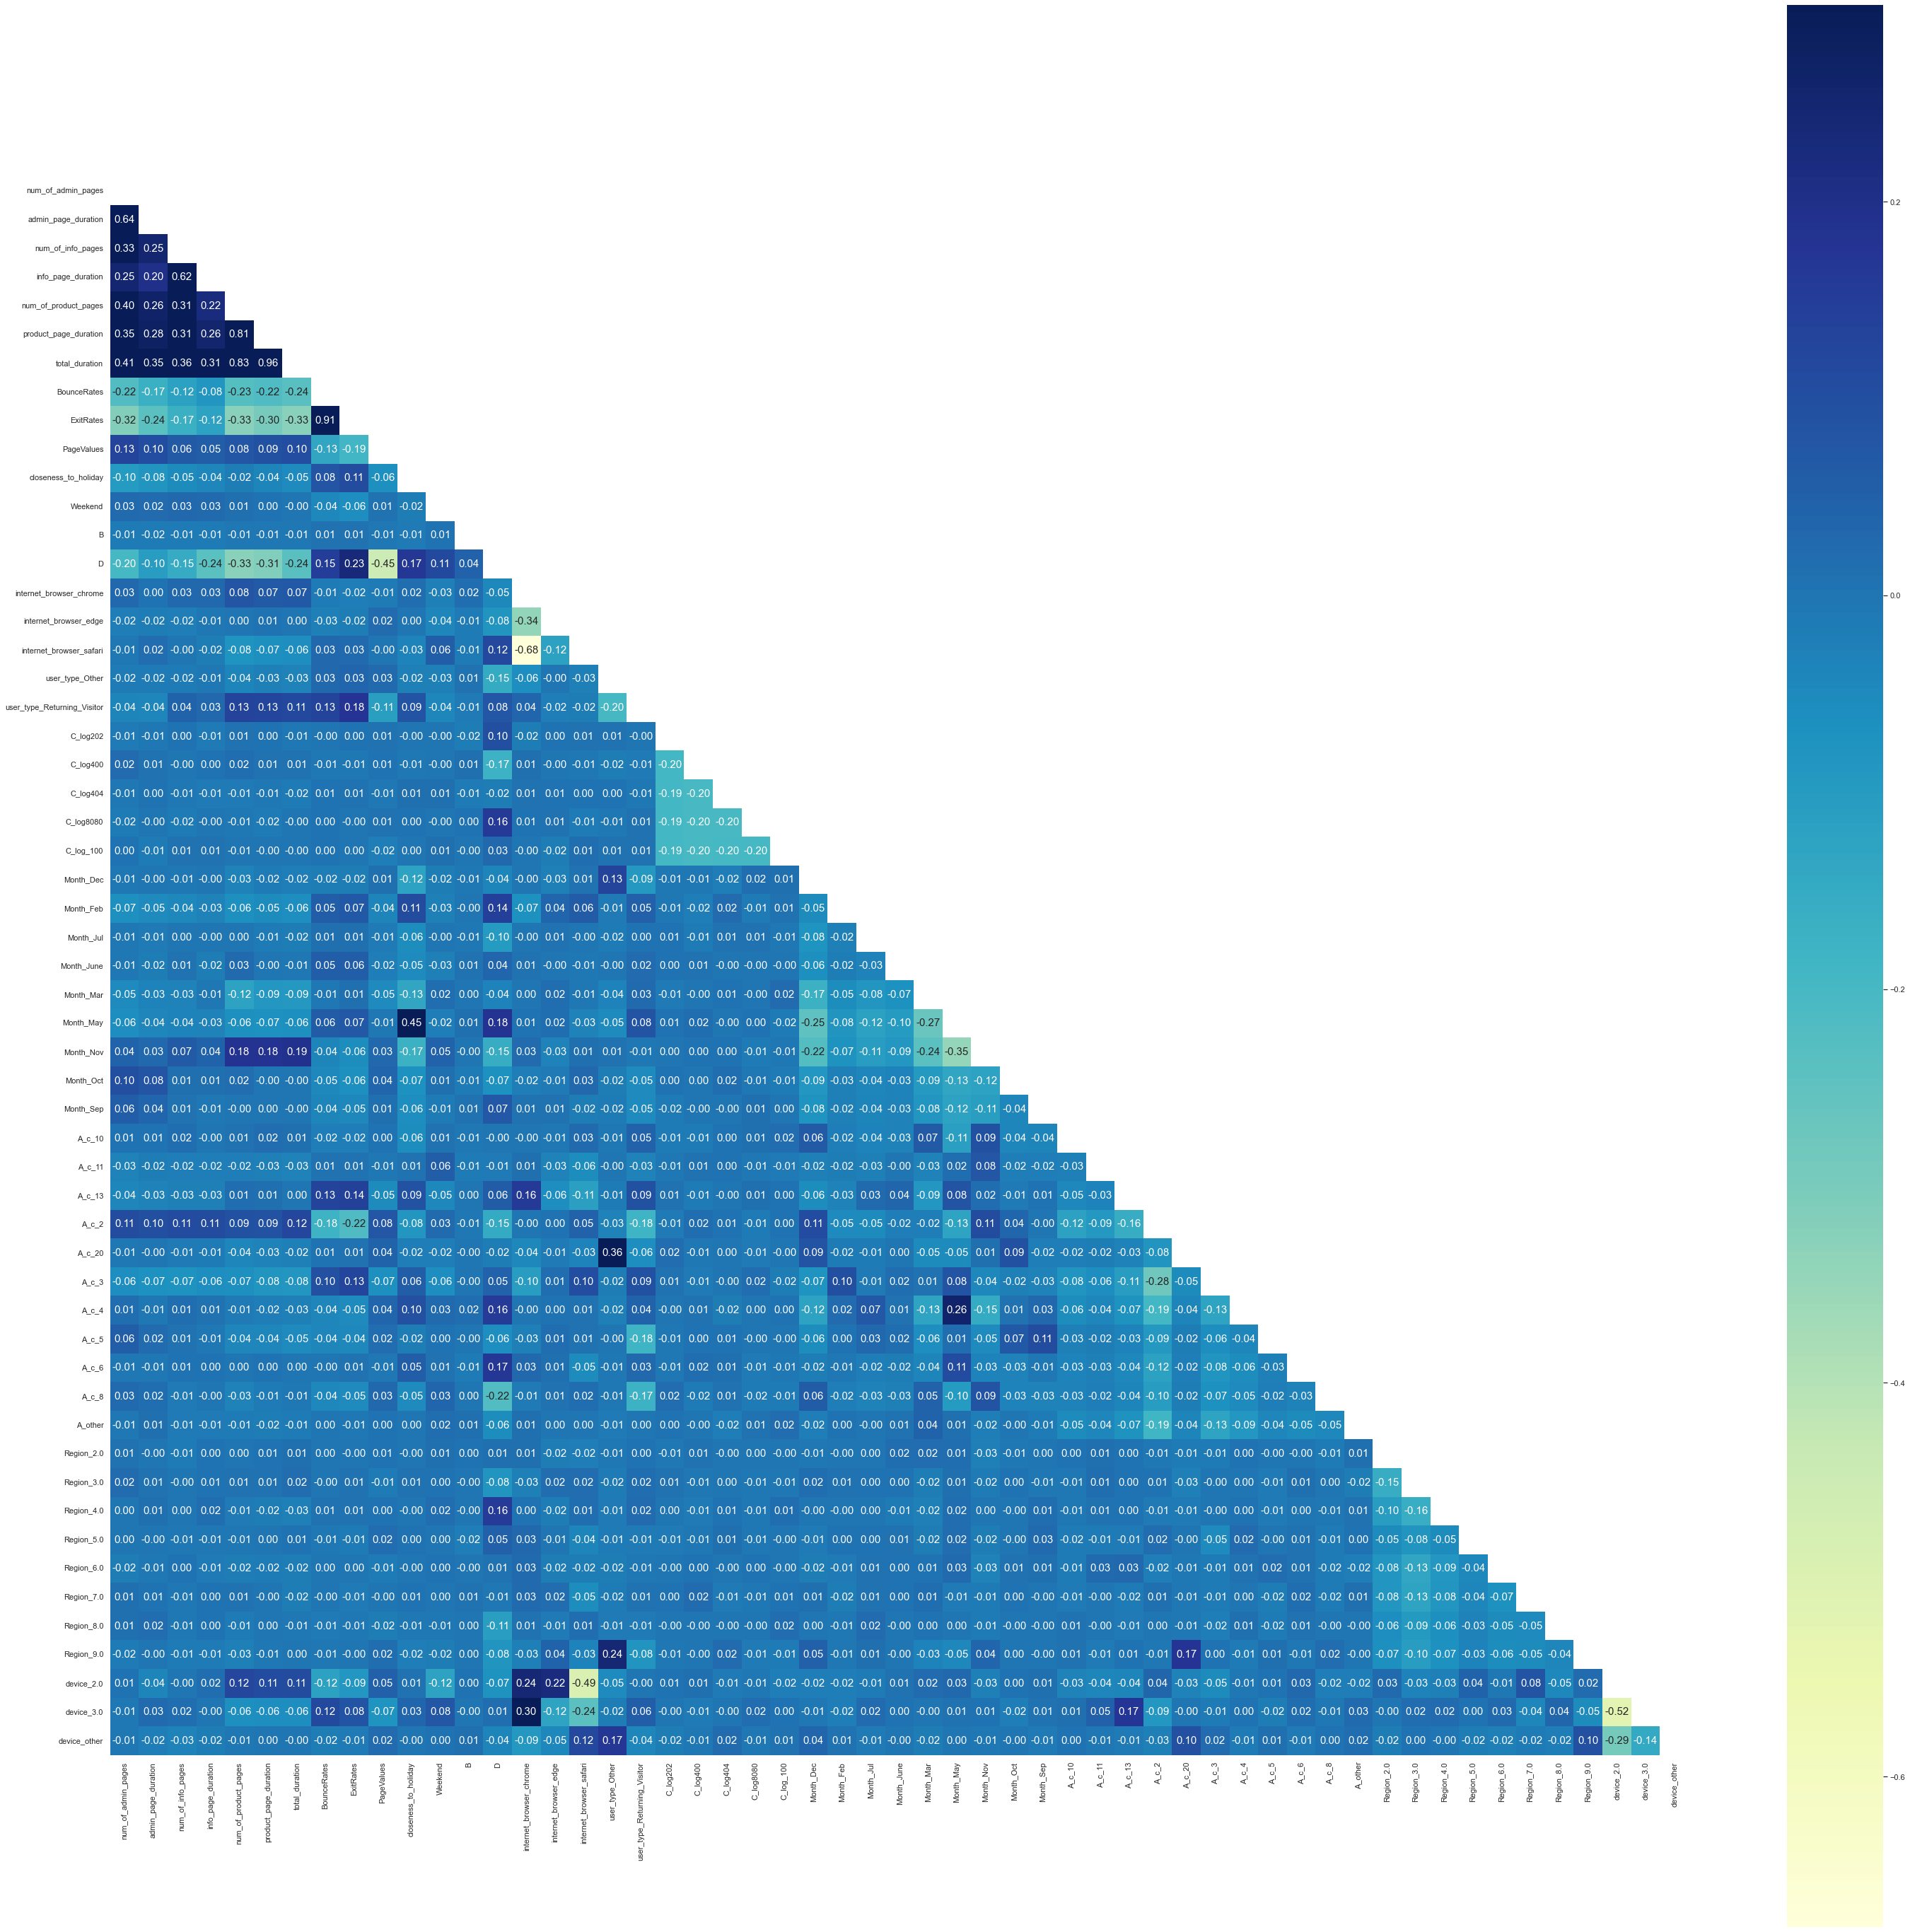

Correlation
product_page_duration   total_duration                  0.96
BounceRates             ExitRates                       0.91
num_of_product_pages    total_duration                  0.83
                        product_page_duration           0.81
internet_browser_chrome internet_browser_safari         0.68
num_of_admin_pages      admin_page_duration             0.64
num_of_info_pages       info_page_duration              0.62
device_2.0              device_3.0                      0.52
internet_browser_safari device_2.0                      0.49
closeness_to_holiday    Month_May                       0.45
PageValues              D                               0.45
num_of_admin_pages      total_duration                  0.41
                        num_of_product_pages            0.40
num_of_info_pages       total_duration                  0.36
user_type_Other         A_c_20                          0.36

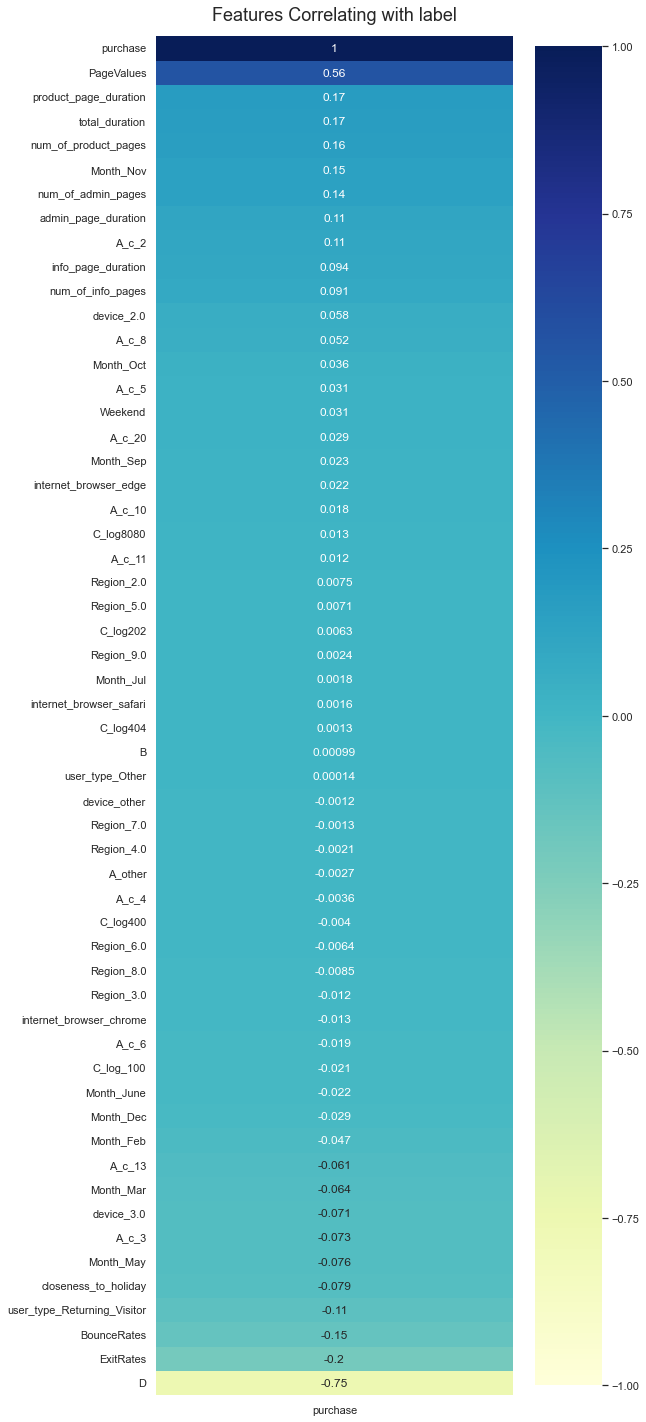

In [38]:
# Correlation between features
corr = data.loc[:, data.columns != 'purchase'].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(50, 50))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True,cmap= "YlGnBu",annot_kws={"fontsize":15}, fmt='.2f')
    plt.show()

# Get the highest correlated features (absolute value)
# We consider correlation to be high if it exceeds ??? in absolute value
corr_matrix = corr.abs()
top_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
top_corr = pd.DataFrame(top_corr).round(2)
top_corr.columns = ['Correlation']
display(top_corr[:15])

#correaltion of each feature with label
plt.figure(figsize=(8, 25))
heatmap = sns.heatmap(data.iloc[:,:].corr()[['purchase']].sort_values(by='purchase', ascending=False), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
heatmap.set_title('Features Correlating with label', fontdict={'fontsize':18}, pad=16)
plt.show()

Returning to the feature "total duration" we can see that is has high correlation with the feature product page duration, and num of product pages. Combine that with its high rate of missing values we decided to remove it. <br>
Also, we can see that BounceRates & ExitRates has high correlation so we will remove the one with the lower correlation with the label - BounceRates. <br><br>

In [39]:
# remove 'total duration' & 'BounceRates' features
data = remove_feature (data,['total_duration','BounceRates'])

Now we can preform the KNN-Imputer for feature D to complete its' missing values

In [40]:
# KNN imputer function
def KNN_Imputer (df,feature): 
# complete missing values by knn imputer and save the median value of the completed values
    val_dict = {}
    imputer = KNNImputer(n_neighbors = 5 ,weights = 'distance')
    imputed_data = imputer.fit_transform(df)  # impute all the missing data
    imputed_data = pd.DataFrame(imputed_data)
    imputed_data.columns = df.columns

    #saving the median value for the test set
    cond = df[feature].isnull()
    cond = np.array(cond).reshape(df.shape[0],)
    comp = imputed_data[feature].loc[cond]
    val_dict[feature] = comp.median()
    df = imputed_data  # update only the desired column
    return df, val_dict

In [41]:
# apply KNN imputer on feature 'D'
data, val_dict6 = KNN_Imputer (data,'D')
missing_val_dict = {**missing_val_dict, **val_dict6}

#### Wrapper method
**PCA** performs linear manipulation on features to remove the number of dimensions while keeping the explained variance.
We will take advantage of this quality and check how many features are needed to preserve above 99% of the explained variance.

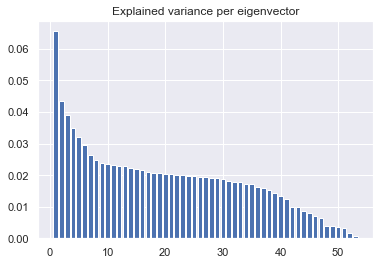

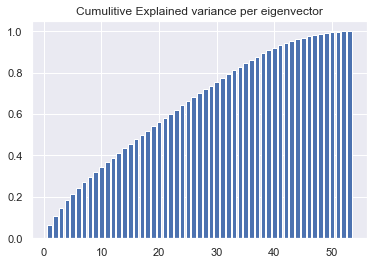

number of components which preserve at least 99% of the variance: 49


In [42]:
#PCA
copy = data.iloc[:,:-1].copy()
# Scale the dataset
sc = StandardScaler()
sc.fit(copy)
copy_std = sc.transform(copy)
# PCA plots
pca = PCA(n_components = copy.shape[1], whiten=True)
pca.fit_transform(copy_std)
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.title("Explained variance per eigenvector")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulitive Explained variance per eigenvector")
plt.show()

pca = PCA(n_components=0.99)
pca.fit(copy_std)
print(f'number of components which preserve at least 99% of the variance: {len(pca.components_)}')

From The plots above it can be deduct that in order to preserve more than 99% we can reduce our dimensions to 49.

Enabling the PCA model on the data will create 49 new featrues that are a linear combination of the original features.
At first, We did so but not only these new features where meaningless and the values will make no sense to the customers, They also did not improve model performance so we decided to try another approach.

We will perform PCA each time on a subset of interrelated features (for example for all dummy variables that related to month), And so even though the values themselves are not informative the columns will retain some of the information.

In [43]:
# PCA functions
def PCA_columns_subset (df, features_lst): #gets features list and does PCA on them, return new columns after PCA
    copy = df[features_lst].copy()
    # Scale the dataset
    sc = StandardScaler()
    copy_std= sc.fit_transform(copy)
    # PCA
    pca = PCA(n_components=0.95)
    pca = pca.fit(copy_std)
    new_cols = pca.transform(copy_std)
    new_cols = pd.DataFrame(new_cols)
    return new_cols, pca

def data_after_PCA (df,features_array):
    new_df = df
    pca_dict ={}
    for i in range(features_array.shape[0]):
        new_cols,pca_train = PCA_columns_subset(df,features_array[i])
        pca_dict[i] = pca_train
        new_df = remove_feature(new_df,features_array[i])
        new_df = pd.concat([new_df,new_cols] , axis = 1)
        # turns the columns names to str to avoid warnings
        new_df = new_df.rename(columns=lambda x: str(x))
    return new_df,pca_dict


def make_columns_lists(df): #makes the columns array for PCA function
    features_to_pca = []
    month, internet, device, user_type, A, C, region = list(), list(), list(), list(), list(), list(),list() 
   
    for i in df.columns:
        if i.startswith("Month"):
            month.append(i)
        elif i.startswith("internet"):
            internet.append(i)
        elif i.startswith("device"):
            device.append(i)
        elif i.startswith("user_type"):
            user_type.append(i)
        elif i.startswith("A"):
            A.append(i)
        elif i.startswith("Region"):
            region.append(i)
        elif i.startswith("C"):
            C.append(i)
            
    month, internet, device, user_type, A,C ,region = np.array(month), np.array(internet),np.array(device),np.array(user_type),np.array(A),np.array(C), np.array(region)
            
    for i in [month, internet, device, user_type, A,C, region]:
        features_to_pca.append(i)
  
    return np.array(features_to_pca, dtype=object)

In [44]:
# apply PCA functions on copy of the data
features_to_pca = make_columns_lists(data)
data, pca_dict = data_after_PCA (data, features_to_pca)
data.insert(len(data.columns)-1, 'purchase', data.pop('purchase'))

Now we will creat train data without the labels - X, and labels column - y. <br>

In [45]:
# split the train data to train data and train labels
X, y = data.iloc[:,:-1], data.iloc[: , -1]

In [46]:
# Total number of features for the models
print(f"In conclusion, our models will work with: {X.shape[1]} features")

In conclusion, our models will work with: 50 features


### Preprocess the Test Sets

##### Now that we finished preprocessing our train set, we need to perform the same manipulation on the test sets.
The process remains the same other than few thing - <br>
* Even though considered as outliers, when coming to predict test set we can't remove samples.
* Filling missing values in the test set is based on the values that were filled in the train set.
This set represent actual customer session and needed to be analyzed as well.

In [47]:
#pre-process for data set
def PCA_columns_subset_test (df, features_lst,pca): #gets features list and does PCA on them, return new columns after PCA
    copy = df[features_lst].copy()
    # Scale the dataset
    sc = StandardScaler()
    copy_std= sc.fit_transform(copy)
    # PCA
    new_cols = pca.transform(copy_std)
    new_cols = pd.DataFrame(new_cols)
    return new_cols

def data_after_PCA_test (df,features_array,pca_dict):
    new_df = df
    for i in range(features_array.shape[0]):
        new_cols= PCA_columns_subset_test(df,features_array[i],pca_dict[i])
        new_df = remove_feature(new_df,features_array[i])
        new_df = pd.concat([new_df,new_cols] , axis = 1)
        # turns the columns names to str to avoid warnings
        new_df = new_df.rename(columns=lambda x: str(x))
    return new_df

def preprocess (df,pca_dict={},missing_val_dict = {},train = False): # does all the pre-processing on a given train/test set
    #repairing
    repair_internet_browser (df, ['browser', 'chrome', 'edge', 'safari'])
    repair_duration(df, ['info_page_duration','product_page_duration'])
    repair_A(df)
    
    #unite categories in 'A' & 'device'
    unite_categories(df, cat_dict)
    
    #outlier removal
    if (train):
        df = outlier_removal_SD(df , 'B')
        df = remove_by_thresholds(df, features_to_thresholds, 0.995, False)
        df.reset_index(drop=True, inplace=True)
    
    #normalization
    df = norm_min_max(df, features_to_min_max)
    df = norm_standard_scaler(df, features_to_standard_scaler)
    
    #missing values train
    if (train): #for train set
        df, missing_val_dict1 = missing_values (df,features_to_median, features_mode_str,
                                        features_mode_int,features_to_remove_rows,
                                        fetures_replace_to_given_value)
        #encoding
        df = encoding_features(df,'Weekend',weekend)
        df = dummies_features(df,['internet_browser','user_type','C','Month','device', 'Region','A'])
    
    #remove columns
    df = remove_feature (df,['BounceRates', 'id', 'total_duration'])
    
    # missing values - D feature in train
    if (train):
        df, val_dict6 = KNN_Imputer (df,'D')
        missing_val_dict = {**missing_val_dict1, **val_dict6}
    
    # missing values test    
    if (train==False): # for test set
        for col in df.columns:
            val = missing_val_dict[col]
            df[col]=df[col].fillna(val)
        #encoding
        df = encoding_features(df,'Weekend',weekend)
        df = dummies_features(df,['internet_browser','user_type','C','Month','device', 'Region','A'])
    
    ##PCA
    features_to_pca = make_columns_lists(df)
    #PCA train
    if (train):
        df, pca_dict = data_after_PCA (df, features_to_pca)
    #PCA test
    else:
        df= data_after_PCA_test (df, features_to_pca,pca_dict)
        
    if (train):
        df.insert(len(df.columns)-1, 'purchase', df.pop('purchase'))
        return df , missing_val_dict, pca_dict
    else:
        return df

In [48]:
# Pre-processing on the test
test_data = preprocess(test_data,pca_dict, missing_val_dict, False)

## Part 3 + Part 4 - Machine Learning Models and Evaluating

##### We decided to train the following models: KNN, Logistic Regression, ANN, Random Forest.
In order to evaluate our models we will perform K-fold Cross Validation and plot the ROC Curves of each fold including the mean AUC score.<br>The best model will be the one with the highest mean AUC score. <br>
To check the performance differences between running the model on the Train or on the Validation, and if our models are overfitted we Split the data into two parts: Train (75%) and Validation (25%) sets. <br>

In [49]:
# split the train data to train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

For tuning hyperparameters we used plots and 2 build in functions: <br>
1. Grid search: exhaustively considers all parameter combinations for an estimator, trying to maximized given score.
2. Random search: in this method not all parameter combinations are tried out, but rather a fixed number of random combinations.
We prefer the first method because it is more comprehensive, but due to running time limit, we will use the second method for some of the models.

In [50]:
# models functions
# This function performs Random Search and prints the top combinations and their scores
def perform_random_search(classifier, parameters, X_train, y_train):
    search = RandomizedSearchCV(classifier, parameters, scoring = 'roc_auc', verbose = 0, random_state = 42)
    search.fit(X_train, y_train)
    return search.best_params_

# This function performs GridSearchCV and prints the top combinations and their scores
def perform_grid_search(classifier, parameters, X_train, y_train):
    search = GridSearchCV(classifier, parameters, scoring = 'roc_auc', verbose = 0)
    search.fit(X_train, y_train)
    return search.best_params_

# This function plots and prints the confusion matrix as awell as the AUC score
def plot_print_cm(y_true, y_pred, y_prob, title, valid_or_test, plot = True, metrics = False):
    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    cm = np.array([[tp,fp],
                   [fn,tn]])
    
    # ROC Curve and AUC Score
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    valid_auc = auc(fpr,tpr)
    
    # plot the confusion matrix
    if plot:
        f, ax = plt.subplots(figsize=(5, 5))
        ax = sns.heatmap(cm,
                    annot=True,
                    fmt='g',
                    cmap='Blues',
                    yticklabels = ["predicted p","predicted n"],
                    xticklabels = ["real p","real n"]).set_title(title)
        plt.show()
    
    print(f"{valid_or_test} AUC: %.5f"%valid_auc)
    
    # print metrics deducted from the confusion matrix
    if metrics:
        # Given a random session, what are the chances of being predicted correctly?
        accuracy = (tp+tn) / (tp+tn+fp+fn)
        # of all the sessions that were purchase, how many did we correctly predict
        sensitivity = tp / (tp+fn)
        # of all the sessions that were non purchase, how many did we correctly predict
        specificity = tn / (tn+fp)
        # how many of the sessions that were labeled as purchase were actually purchase
        precision = tp / (tp + fp)
        
        print("\nValidation Metrics:")
        print(f"Accuracy Score: {accuracy.round(2)}")
        print(f"Sensitivity Score: {sensitivity.round(2)}")
        print(f"Specificity Score: {specificity.round(2)}")
        print(f"Precision Score: {precision.round(2)}")
        
# This function fit a model and predicts on the validation set
# can also predict on the train set for evaluation of overfit (set the boolean flag)
def model_func(classifier, params, X_train, y_train, X_valid, y_valid, valid_or_test,
               compare_train_validation = False, cm = False, metrics = False):
    # train the model
    clf = classifier(**params)
    clf.fit(X_train, y_train)
    
    if compare_train_validation:
        # train predict
        train_pred_clf = clf.predict(X_train)
        train_prob_clf = clf.predict_proba(X_train)[:,1]
        plot_print_cm(y_train, train_pred_clf, train_prob_clf, "Training Set Confusion Matrix", "Train", cm)

    # validation predict
    valid_pred_clf = clf.predict(X_valid)
    valid_prob_clf = clf.predict_proba(X_valid)[:,1]
    plot_print_cm(y_valid, valid_pred_clf, valid_prob_clf, "Validation Set Confusion Matrix", valid_or_test, cm, metrics)
    
# This function perform k-fold cross validation, plots the ROC Curve of each fold, and show the AUC Score
def KfoldPlot(X, y, clf, k):
    # Creating the k-folds
    kf = KFold(n_splits=k) 
    
    # setting plot size
    plt.figure(figsize=(5,5))

    # To caculate the mean ROC we will use the numpy.interp()
    # First we calculate the sum, after the loop it will be divided by 'k' for mean
    sum_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    # each iteration for different fold
    i = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.take(list(train_index),axis=0), X.take(list(test_index),axis=0)
        y_train, y_test = y.take(list(train_index),axis=0), y.take(list(test_index),axis=0)
        
        # training the classifier model
        clf.fit(X_train, y_train)
        y_prob = clf.predict_proba(X_test)[:,1]
        
        # ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        
        # ROC Curve Plot 
        single_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='orange',label='ROC fold %d (AUC = %.4f)' % (i, single_auc)) #The ROC curve of the train
        i += 1
        # summing the ROC for later mean calculation
        sum_tpr += np.interp(mean_fpr, fpr, tpr)
        sum_tpr[0] = 0.0 # must start with '0'
        
    # Dividing the sum by k
    mean_tpr = sum_tpr / k
    mean_tpr[-1] = 1.0 # must end with '1'
    mean_auc = auc(mean_fpr, mean_tpr)
    
    # Random guess line plot
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    # Mean ROC Curve plot
    plt.plot(mean_fpr, mean_tpr, color='red', linestyle='-', label='Mean ROC (area = %0.4f)' % mean_auc)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title(f"{type(clf).__name__} ROC Curve")
    plt.show()
    print('Mean AUC = %0.4f' % mean_auc)

# this function plots the differences of the train and test AUC while incresing a specific parameter
def plot_parameter(model, params, param_name, values, X_train, y_train, X_valid, y_valid):
    # define lists to collect scores
    train_scores, valid_scores = list(), list()
    # define the tree depths to evaluate
    for i in values:
        # add parameter to be checked
        params[param_name] = i
        model = RandomForestClassifier(**params)
        
        # fit model on the training dataset
        model.fit(X_train, y_train)

        # evaluate on the train dataset
        train_yhat = model.predict_proba(X_train)[:,1]
        fpr, tpr, thresholds = roc_curve(y_train, train_yhat)
        train_auc = auc(fpr, tpr)
        train_scores.append(train_auc)

        # evaluate on the valid dataset
        valid_yhat = model.predict_proba(X_valid)[:,1]
        fpr, tpr, thresholds = roc_curve(y_valid, valid_yhat)
        valid_auc = auc(fpr, tpr)
        valid_scores.append(valid_auc)

        # summarize progress
        print('%d -  train: %.3f, valid: %.3f' % (i, train_auc,valid_auc))
    

    # plot of train and valid scores vs tree depth
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, valid_scores, '-o', label='Valid')
    plt.title("Max depth vs AUC")
    plt.xlabel("Max depth")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()

# To obtain the most out of the K-fold Cross Validation,
# we will concatanate the train and validation sets only for this purpose of resplitting
X_ROC = pd.concat([X_train, X_valid])
y_ROC = pd.concat([y_train, y_valid])

### KNN

The significant hyperparameter in KNN classifier is k - the number of neighbors. The higher the number of neighbors the lower variance and the complexity of the model and less chance to overfittig.
Explanation: Since each sample takes into account a large number of neighbors and does not adapt itself only to a small number of neighbors.
We will examine a plot that shows the model's performance (AUC metric) on the train set and on the validation set as a function of the number of neighbors to help us understande the optimal K.

>1, train: 1.000, valid: 0.565
>11, train: 0.821, valid: 0.650
>21, train: 0.785, valid: 0.670
>31, train: 0.766, valid: 0.701
>41, train: 0.761, valid: 0.698
>51, train: 0.750, valid: 0.708
>61, train: 0.750, valid: 0.703
>71, train: 0.751, valid: 0.709
>81, train: 0.749, valid: 0.713
>91, train: 0.751, valid: 0.715
>101, train: 0.750, valid: 0.715
>111, train: 0.749, valid: 0.716
>121, train: 0.749, valid: 0.717
>131, train: 0.749, valid: 0.715
>141, train: 0.748, valid: 0.717
>151, train: 0.747, valid: 0.721


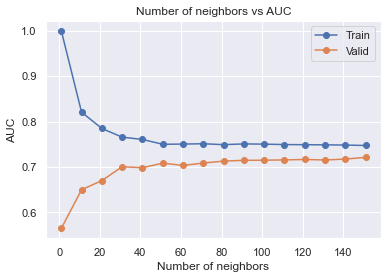

In [51]:
#KNN Hyper parameter tuning
# define lists to collect scores
train_scores, valid_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 160, 10)]
# evaluate knn for each n_neighbors
for i in values:
    # configure the model
    params = {'n_neighbors' : i,
              'p' : 1,
              'weights' : 'uniform'}
    model = KNeighborsClassifier(**params)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)
    
    # evaluate on the train dataset
    train_yhat = model.predict_proba(X_train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, train_yhat)
    train_auc = auc(fpr, tpr)
    train_scores.append(train_auc)
    
    # evaluate on the valid dataset
    valid_yhat = model.predict_proba(X_valid)[:,1]
    fpr, tpr, thresholds = roc_curve(y_valid, valid_yhat)
    valid_auc = auc(fpr, tpr)
    valid_scores.append(valid_auc)

    # summarize progress
    print('>%d, train: %.3f, valid: %.3f' % (i, train_auc,valid_auc))
# plot of train and valid scores vs n_neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, valid_scores, '-o', label='Valid')
plt.title("Number of neighbors vs AUC")
plt.xlabel("Number of neighbors")
plt.ylabel("AUC")
plt.legend()
plt.show()

We can see that around 150 neighbors the AUC score moderates and barely continues to rise. <br>
Through the combination of the plot and gridsearch We chose 151 neighbors, <br>
We also gave equal weight to each neighbor and calculated manhattan distance. <br>
Seeing the AUC results we can say that the model didn't overfit!

Train AUC: 0.74731
Validation AUC: 0.72111


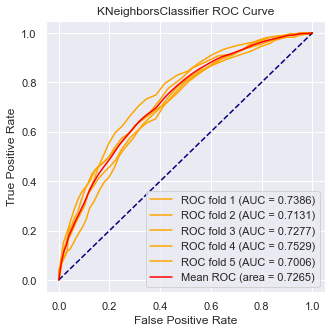

Mean AUC = 0.7265


In [52]:
# Gridsearch KNN
n_neighbors = [21, 31, 51, 91, 101, 151]
algorithms = ['auto', 'brute']
metric = ['euclidean', 'manhattan', 'minkowski' ,'mahalanobis']
parameters = {'n_neighbors' : n_neighbors,
              'metric' : metric,
              'algorithm' : algorithms}
params = perform_grid_search(KNeighborsClassifier(), parameters, X_train, y_train)

#KNN
classifier = KNeighborsClassifier
# the chosen parameters for KNN
# params = {
#     'n_neighbors':151,
#     'weights':'uniform',## default
#     'algorithm':'auto',## default
#     'leaf_size':30, ## default
#     'p':2,## default
#     'metric':'manhattan', 
#     'metric_params':None, ## default
#     'n_jobs':-1}

# print AUC scores
model_func(classifier, params, X_train, y_train, X_valid, y_valid, "Validation", True, False, False)
# K fold
clf = classifier(**params)
KfoldPlot(X_ROC, y_ROC, clf, 5)

### Logistic regression

Logistic regression models tend to overfit the data, particularly in high-dimensional settings. For this reason, it’s common to use some kind of regularisation method to prevent the model from fitting too closely to the training data.
We set the stopping criteria to 0.01 and decreased C to 0.1 to get more regularization.<br>
Overall the model does not overfit, and the scores are higher than the KNN's scores.

Train AUC: 0.95153
Validation AUC: 0.95150

Validation Metrics:
Accuracy Score: 0.91
Sensitivity Score: 0.87
Specificity Score: 0.91
Precision Score: 0.63


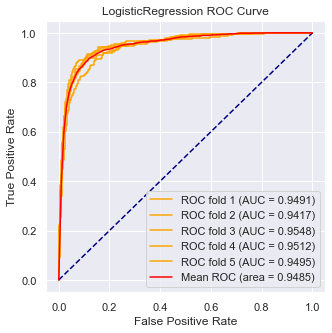

Mean AUC = 0.9485


In [53]:
# Gridsearch Logistic Regression
penalty = ['l1', 'l2']
C = [5, 3, 1, 0.1, 0.01]
tol = [0.01, 0.005, 0.001]
class_weight = [None, 'balanced']
solver = ['newton-cg', 'lbfgs', 'liblinear']

parameters = {'penalty' : penalty,
              'C': C,
              'tol' : tol,
              'solver' : solver, 
              'class_weight' : class_weight}
params = perform_grid_search(LogisticRegression(), parameters, X_train, y_train)

# Logistic Regression
classifier = LogisticRegression

# the chosen parameters for Logistic Regression
# params = {
#     'penalty':'l1',
#     'dual':False, ## default
#     'tol':0.01 , 
#     'C':0.1, 
#     'fit_intercept':True, ## default
#     'intercept_scaling':1, ## default
#     'class_weight':'balanced', 
#     'random_state': 42,
#     'solver':'liblinear', 
#     'max_iter':150,  
#     'multi_class':'auto', ## default
#     'verbose':0,  ## default
#     'warm_start':False,  ## default
#     'n_jobs':-1, 
#     'l1_ratio':None ## default}

params['random_state'] = 42

# print AUC scores
model_func(classifier, params, X_train, y_train, X_valid, y_valid, "Validation", True, False, True)

# K fold
clf = classifier(**params)
KfoldPlot(X_ROC, y_ROC, clf, 5)

#### features importance-

In order to analyze the contribution of each feature to the success of the model, we will look at the coefficients in the regression equation. <br> Only for the features that did not transpormed with PCA

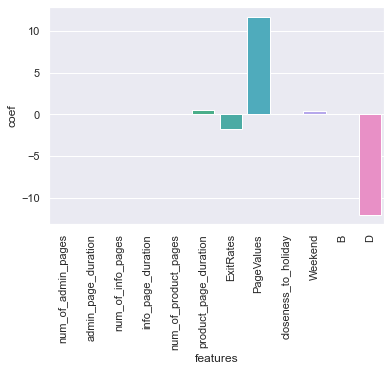

In [54]:
coef_data = pd.DataFrame({'features': X.columns[:12], 'coef': clf.coef_[0,:12]})
fig, ax = plt.subplots()
sns.barplot(data=coef_data, x="features", y="coef", edgecolor="white")
plt.xticks(rotation=90)
plt.show()

From the plot above it can be seen that the features with the largest coefficients (positive or negative) are 'D' and 'PageValues'. <br> 
We can not guess why feature 'D' is important for the model because we don't know what his values mean, but for the 'PageValues' feature we can that this is an important metric because E-commerce sites define pages related to making purchases as pages with a high page value, <br> and therefore a user with a high value of the above feature was close to making a purchase or making a purchase.

### Artificial Neural Network

We set the penalty to 0.02 and the number of iterations to 1250.
The scores are slightly worst than the Logistic Regression but still better that the KNN's scores and also not overfitted!

Train AUC: 0.94556
Validation AUC: 0.94447


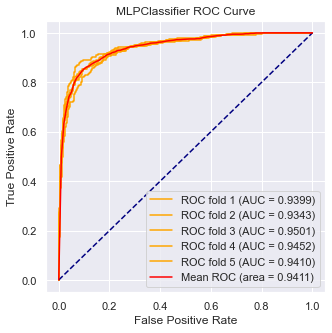

Mean AUC = 0.9411


In [55]:
# Random Search ANN
activation = ['identity', 'logistic', 'tanh', 'relu']
alpha = [0.02, 0.01, 0.03, 0.05]
learning_rate  = ['constant', 'invscaling', 'adaptive']
max_iter = [300, 500, 750, 1000, 1250]
parameters = {'activation' : activation,
              'alpha': alpha,
              'learning_rate' : learning_rate,
              'max_iter' : max_iter}
params = perform_random_search(MLPClassifier(), parameters, X_train, y_train)

# Artificial Neural Network
classifier = MLPClassifier
# the chosen parameters for Artificial Neural Network
# params = {
#     'hidden_layer_sizes':100,  ## default
#     'activation':'identity',
#     'solver':'adam',  ## default
#     'alpha':0.02,  
#     'batch_size':'auto', ## default
#     'learning_rate':'adaptive',
#     'learning_rate_init':0.001,  ## default
#     'power_t':0.5, ## default
#     'max_iter':1250,  
#     'shuffle':True, ## default
#     'random_state': 42, 
#     'tol':0.0001, ## default
#     'verbose':False, ## default
#     'warm_start':False, ## default
#     'momentum':0.9, ## default
#     'nesterovs_momentum':True, ## default
#     'early_stopping':False, ## default
#     'validation_fraction':0.1, ## default
#     'beta_1':0.9, ## default
#     'beta_2':0.999, ## default
#     'epsilon':1e-08, ## default
#     'n_iter_no_change':10, ## default
#     'max_fun':15000 ## default}

params['random_state'] = 42

# print AUC scores
model_func(classifier, params, X_train, y_train, X_valid, y_valid, "Validation", True, False, False)

# K fold
clf = classifier(**params)
KfoldPlot(X_ROC, y_ROC, clf, 5)

### Random forest

As thought in class, we understood the serious effect max_depth has on a tree based model.<br>
The following plots will help us tune the "max_depth" hyperparameter for RandomForest.<br>
All the other hyperparameters are exactly the same as the random search later on.<br>
All except for "n_estimators" which we changed from 750 to 100 for optimization sake.<br>
The effect on the model AUC score is minimal to none and the general idea is not harmed.

1 -  train: 0.931, valid: 0.940
2 -  train: 0.947, valid: 0.952
3 -  train: 0.958, valid: 0.959
4 -  train: 0.963, valid: 0.959
5 -  train: 0.970, valid: 0.963
6 -  train: 0.977, valid: 0.966
7 -  train: 0.983, valid: 0.966
8 -  train: 0.989, valid: 0.969
9 -  train: 0.993, valid: 0.970
10 -  train: 0.996, valid: 0.971
11 -  train: 0.998, valid: 0.970
12 -  train: 0.999, valid: 0.971
13 -  train: 1.000, valid: 0.971
14 -  train: 1.000, valid: 0.969


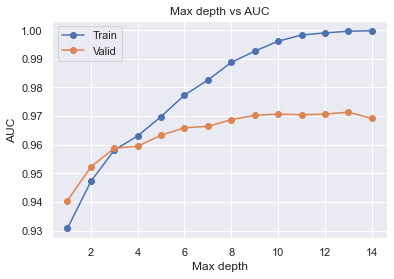

In [56]:
params = {
    'n_estimators':100,  
    'criterion':'entropy',#'gini',  ## default
    'max_depth':10, 
    'min_samples_split':4,   
    'min_samples_leaf':2,   
    'min_weight_fraction_leaf':0.0,   ## default
    'max_features':'auto',  
    'max_leaf_nodes':None,   ## default
    'min_impurity_decrease':0.0,   ## default
    'bootstrap':True,   ## default
    'oob_score':False,   ## default
    'n_jobs':-1,  
    'random_state':42,  
    'verbose':0,   ## default
    'warm_start':False, ## deafult 
    'class_weight':None,   ## default
    'ccp_alpha':0.0,   ## default
    'max_samples':None   ## default
}

#plot train & valid AUC with different max depth values
param_name = 'max_depth'
values = [i for i in range(1, 15)]
plot_parameter(RandomForestClassifier, params, param_name, values, X_train, y_train, X_valid, y_valid)

###### As we increase "max_depth", the train and validation AUC rise until the 12 mark.
At that point, the train AUC continue to rise until reaching 1.0 (overfit) while the validation AUC remain at ~0.96.<br>
Explanation: With deeper trees we get better score for the train data, meaning low bias, however there is more variance, as we can see by the lower validation score.<br>

We set the number of trees to 100 and set the max_features to square root.<br>
We increased the minimum sample per split to 3 and incresed the minimum sample per leaf to 2.<br>
We chose the maximum depth of a tree to be 6, thus achieving a good tradeoff between maximizing the validation AUC and reducing overfit.<br>

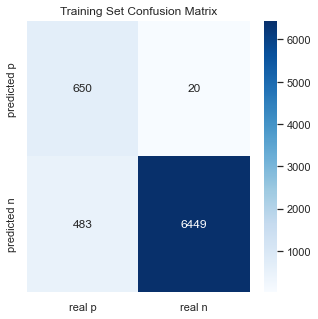

Train AUC: 0.97577


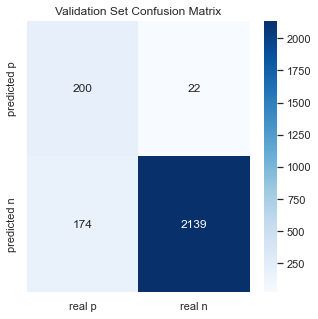

Validation AUC: 0.96239

Validation Metrics:
Accuracy Score: 0.92
Sensitivity Score: 0.53
Specificity Score: 0.99
Precision Score: 0.9


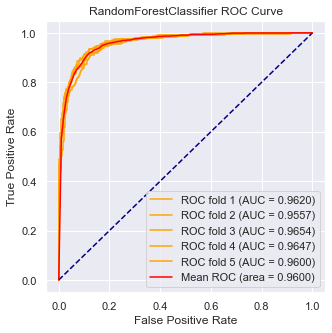

Mean AUC = 0.9600


In [57]:
# Random search Random Forest
criterion = ['gini', 'entropy']
n_estimators = [100, 500, 750, 1000]
min_samples_split = [3, 5, 7]
max_features = ["auto", "sqrt", "log2"]
max_depth = [i for i in range (1, 15)]
min_samples_leaf = [1, 2, 3]
n_jobs = [-1]
parameters = {
     'criterion': criterion,
    'n_estimators': n_estimators,
     'min_samples_split' : min_samples_split,
     'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'n_jobs' : n_jobs
}
params = perform_random_search(RandomForestClassifier(), parameters, X_train, y_train)

# Random Forest
classifier = RandomForestClassifier
# the chosen parameters for RandomForestClassifier
# params = {
#     'n_estimators':100,  
#     'criterion':'gini', ## default
#     'max_depth':6, 
#     'min_samples_split':3,   
#     'min_samples_leaf':2,   
#     'min_weight_fraction_leaf':0.0,  ## default
#     'max_features':'sqrt',## default
#     'max_leaf_nodes':None, ## default
#     'min_impurity_decrease':0.0,  ## default
#     'bootstrap':True, ## default
#     'oob_score':False, ## default
#     'n_jobs':-1,  
#     'random_state': 42,    
#     'verbose':0,   ## default
#     'warm_start':False, ## deafult 
#     'class_weight':None,  ## default
#     'ccp_alpha':0.0,   ## default
#     'max_samples':None   ## default }

params['n_estimators'] = 100
params['max_depth'] = 6
params['random_state'] = 42

# print AUC scores
model_func(classifier, params, X_train, y_train, X_valid, y_valid, "Validation", True, True, True)

# K fold
clf = classifier(**params)
KfoldPlot(X_ROC, y_ROC, clf, 5)

#### features importance-

In order to analyze the contribution of each feature to the success of the model, we will look at features importance plot.

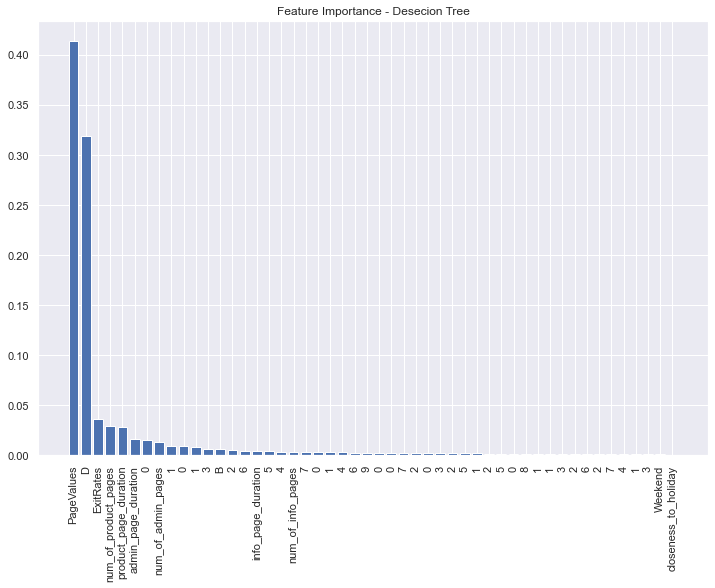

In [58]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# plot
pos = np.arange(sorted_idx.shape[0]) + .5
plt.rcParams["figure.figsize"] = (12,8)
plt.bar(pos, feature_importance[sorted_idx], align='center')
plt.xticks(pos, np.array(X_train.columns)[sorted_idx], rotation = 90)
plt.title('Feature Importance - Desecion Tree')
plt.show()

Similar to the Logistic Regression model, it can be seen that the two most important features are 'D' and 'PageValues'.<br>   In retrospect, we can say that the thought of not removing feature 'D' Was right.

### Evaluating the Chosen Model

#### We choose the Random Forest model as it is perfoming the best and deliver better results.
Each confusion matrix presents the amount of accurately classified labels.<br>
Top left: **True Positive** - predicted purchase and was right.<br>
Bottom left: **False Negative** - predicted non purchase and was wrong (Type 2 Error).<br>
Top right: **False Positive** - predicted non purchase and was wrong (Type 1 Error).<br>
Bottom right: **True Negative** - predicted non purchase and was right.<br>
<br>
* Our model has a low False-Positive value, meaning that the amount of cases in which the model predicts purchase and wrong are low. In addition, the model has a high True-Negative value, which means that the model is able to predict correctly non purchase - who are the users who browsed the site and did not make a purchase.<br><br>
 
* If we consider all the cases in which an actual purchase was made (real p, the left side of the matrix) - the model predicts correctly more than half of the cases, but we would still like to get a lower False Negative value. <br><br>

* We will look at the additional indices that can be deduced from the confusion matrix, given the default threshold for classification which is 50% (this threshold has economic-business significance because if it is lower then more examples, even those that are incorrect - will be classified as purchase, and if the threshold Will be high so many examples that should have been categorized as purchase will be 'missed'. Therefore a 50% threshold is certainly not appropriate in this case): <br>
Our model has a higher Specificity in comparizon of Sensitivity, meaning we cover more negatives rather than positives and have less "False Alarms".<br>
For our customers, our model can assure that the majority of the the users that are going to end the session without purchase will be detected.<br>
For shopping websites, it is very important that a customer who has already entered the website and time on it will end the session with a purchase. Therefore, it is important to identify customers who entered the site and did not purchase anything so that they can be targeted (with emails, adds, etc) to get them to return to the site and end the session with purchase. <br> This will increase the profits of the website

Even though the train AUC is 0.97 and the validation AUC is lower it does not necessarily mean that model is overrfitted.
0.96 is still considered a very good AUC for a predictive model.

## Part 5 - Predicts for test , Submit Results and Pipeline

### Submit Results

In [69]:
# predict test result
def last_fit(classifier, params, X, y):# This function fits the classifier on the train dataset
    # train the model
    clf = classifier(**params)
    clf.fit(X, y)
    return clf

# This function predicts the probabilities of the test dataset and saves the df as a .csv file
def submit_results(clf, test_data):
    test_prob = clf.predict_proba(test_data)[:,1]
    test_prob = pd.DataFrame(test_prob)
    test_prob.to_csv('Submission_group_21.csv', header = ["predict_prob"])

In [60]:
classifier = RandomForestClassifier
params = {
    'n_estimators':100,  
    'criterion':'gini', ## default
    'max_depth':6, 
    'min_samples_split':3,   
    'min_samples_leaf':2,   
    'min_weight_fraction_leaf':0.0,  ## default
    'max_features':'sqrt',## default
    'max_leaf_nodes':None, ## default
    'min_impurity_decrease':0.0,  ## default
    'bootstrap':True, ## default
    'oob_score':False, ## default
    'n_jobs':-1,  
    'random_state': 42,  
    'verbose':0,   ## default
    'warm_start':False, ## deafult 
    'class_weight':None,  ## default
    'ccp_alpha':0.0,   ## default
    'max_samples':None   ## default 
}

clf = last_fit(classifier, params, X, y)

In [65]:
submit_results(clf, test_data)

### pipeline

Note! Activating the pipeline function bellow returns a CSV file of predictions that may overwrite the original file from above!

In [67]:
def pipeline (train_data, test_data): # preform all preprocess & training the model & submit results
    ## Import data sets
    # Importing the train data
    train_file_name = train_data + '.csv'
    train_data = pd.read_csv(train_file_name)

    # Importing the test data
    test_file_name = test_data + '.csv'
    test_data = pd.read_csv(test_file_name)  

    ## Preprocess data sets
    #Train preprocess
    train_data, missing_val_dict, pca_dict = preprocess (train_data,train = True)
    X, y = train_data.iloc[:,:-1], train_data.iloc[: , -1]

    #Test preprocess
    test_data = preprocess (test_data, pca_dict, missing_val_dict, train = False)

    ## Train chosen model
    clf = last_fit(classifier, params, X, y)

    ## Predict on test set
    submit_results(clf, test_data)

In [68]:
# insert train & test file names ***without*** ".csv"
pipeline('train', 'test')